Here, I have copy and pasted the base code from the website for a better understanding of the concept of repeated k-Fold cross-Validation.

In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [5]:

# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.868 (0.032)


In [6]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.867 (0.031)


>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


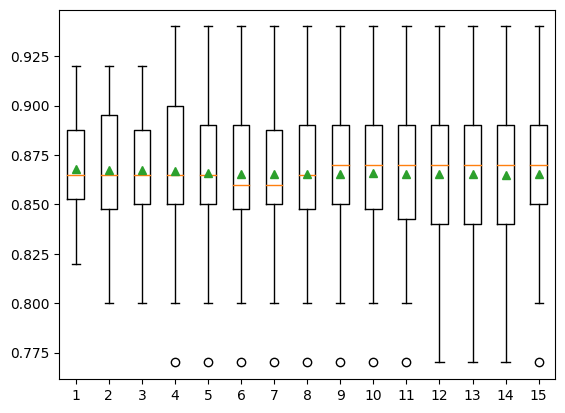

In [7]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
 # prepare the cross-validation procedure
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 # create model
 model = LogisticRegression()
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
 # evaluate using a given number of repeats
 scores = evaluate_model(X, y, r)
 # summarize
 print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
 # store
 results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

I read the discussion forum and found out that we can use grid search for tuning model hyperparameters which help in selecting the best model and improving accuracy. I read about it more on https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html and implemented in the existing code which helped in improving the accuracy by 0.0020, which isn't much but it should work very well with large datasets and help in determining the best model with improved accuracy.


>1 mean=0.8700 se=0.011
>2 mean=0.8685 se=0.008
>3 mean=0.8690 se=0.006
>4 mean=0.8685 se=0.006
>5 mean=0.8684 se=0.005
>6 mean=0.8685 se=0.004
>7 mean=0.8679 se=0.004
>8 mean=0.8674 se=0.004
>9 mean=0.8677 se=0.004
>10 mean=0.8682 se=0.003
>11 mean=0.8679 se=0.003
>12 mean=0.8677 se=0.003
>13 mean=0.8676 se=0.003
>14 mean=0.8675 se=0.003
>15 mean=0.8675 se=0.003
Best Hyperparameters: {'lr__C': 0.1, 'lr__solver': 'lbfgs'}


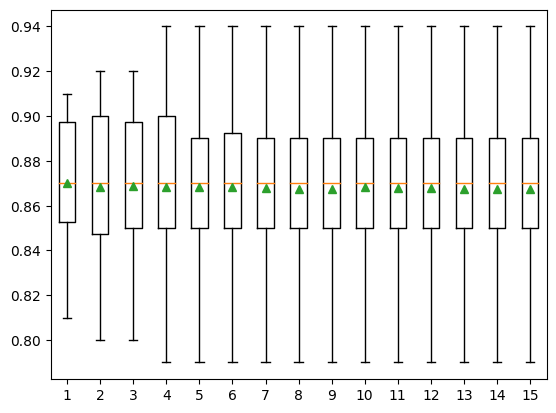

In [8]:
from scipy.stats import sem
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate a model
def evaluate_model(X, y, repeats):
    #  cross-validation
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)


    model = Pipeline(steps=[
        ('scaler', StandardScaler()),  # standardize the data
        ('lr', LogisticRegression(max_iter=1000))  # logistic regression
    ])

    # define hyperparameters to tune
    param_grid = {
        'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'lr__solver': ['lbfgs', 'liblinear']
    }

    # apply GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

    # fit the model
    grid_search.fit(X, y)

    # evaluate the best model
    scores = cross_val_score(grid_search.best_estimator_, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    return scores, grid_search.best_params_


X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# configurations to test
repeats = range(1, 16)
results = list()
best_params = None

for r in repeats:
    # evaluate using a given number of repeats
    scores, best_params = evaluate_model(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)

print("Best Hyperparameters:", best_params)

# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()
